### Introduction to classification
1. Binary Classification
2. Multiclass classification
3. Multilabel classification


### Some important points to keep in mind for classification
1. Binary Classification
* LossFunction - `BinaryCrossEntropyLoss()`
* Metrics - `BinaryAccuracy()`, `Precision()`, `Recall()`, `AUC()`, `F1Score()`
* HiddenLayerActivations - `relu`
* OutputLayerActivations - `sigmoid`

2. Multiclass Classification
* LossFunction - `CategoricalCrossentropyLoss()` -> If the labels are `one-hot` encoded and `SparseCategoricalCrossentropy()` loss if the labels are `integers`
* Metrics - `CategoricalAccuracy()` if the labels are `one-hot` encoded. `SparseCategoricaAccuracy()` if the labels are `integers`
* HiddenLayerActivations - `relu`
* OutputLayerActivations - `softmax`

In [2]:
## Create some toy data
from sklearn import datasets
import pandas as pd

import tensorflow as tf

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [3]:
X, y = datasets.make_circles(n_samples=1000, noise=0.03)
X.shape, y.shape

((1000, 2), (1000,))

In [4]:
# Create a dataframe using the data
data = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "y": y})
data.head()

,X0,X1,y
0,-1.054909,-0.127946,0
1,0.755307,-0.682109,0
2,-1.050460,0.029026,0
3,-0.517291,-0.655163,1
4,0.394643,-0.695759,1


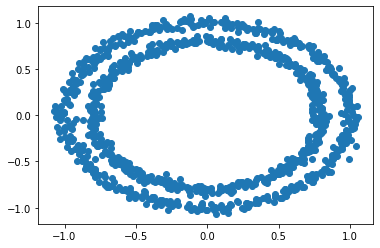

In [5]:
# Plot and visualize the data
import matplotlib.pyplot as plt
plt.scatter(data['X0'], data['X1'])
plt.show()

In [6]:
X[:, 0].shape, X[:, 1].shape

((1000,), (1000,))

### Start with a basic model

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [8]:
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(2,)),
        tf.keras.layers.Dense(10, activation='relu', name="FirstHiddenLayerRelu"),
        tf.keras.layers.Dense(1, activation='sigmoid', name="OutputLayerSigmoid")
    ]
)
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = [tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)
#tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)
history = model.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 4s 7ms/step - loss: 0.6895 - categorical_accuracy: 1.0000 - auc: 0.5724 - precision: 0.5242 - recall: 0.2968
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6777 - categorical_accuracy: 1.0000 - auc: 0.8192 - precision: 0.9302 - recall: 0.1995
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6680 - categorical_accuracy: 1.0000 - auc: 0.8155 - precision: 0.8487 - recall: 0.2519
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6565 - categorical_accuracy: 1.0000 - auc: 0.8418 - precision: 0.8268 - recall: 0.6309
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.6435 - categorical_accuracy: 1.0000 - auc: 0.8903 - precision: 0.9545 - recall: 0.5761
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 0.6295 - categorical_accuracy: 1.0000 - auc: 0.9399 - precision: 0.8997 - recall: 0.6933
Epoch 7/50
25/25 [================

In [9]:
X_train.dtype

dtype('float64')

In [10]:
y_train.dtype

dtype('int64')

In [11]:
y_pred = model.predict(X_test)
y_pred[:10], y_test[:10]

(array([[0.97787917],
        [0.9539101 ],
        [0.96624863],
        [0.03920278],
        [0.8371451 ],
        [0.02161402],
        [0.95239204],
        [0.9849154 ],
        [0.9119648 ],
        [0.81646883]], dtype=float32), array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1]))

In [12]:
import numpy as np


In [13]:
def plot_decision_boundary(model, X, y):
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(
      np.linspace(x_min, x_max, 100),
      np.linspace(y_min, y_max, 100)
  )
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("Multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap = plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


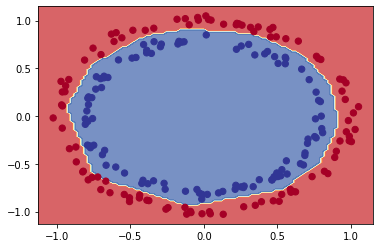

In [14]:
plot_decision_boundary(model = model, X=X_test, y=y_test)

In [15]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'auc', 'precision', 'recall'])

### Loss curves using `history.history` object

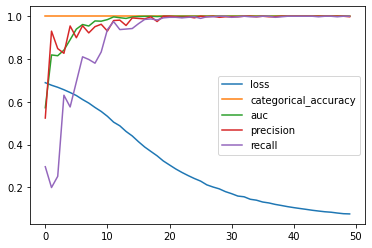

In [16]:
pd.DataFrame(history.history).plot()

### How to find the best learning rate
1. Use learning rate **callback**. This is one more type of callback apart from the `EarlyStopping` we have seen earlier during regression
2. Plot loss v/s learning rate -> Start with a small learning rate (say 0.0001), then increase the learning rate gradually. Plot loss v/s learning rate curve. The loss should decrease and then increase. Ideal learning rate is 10 times less than the learning rate where the loss has a minima and then it becomes flat. Refer figure below (Loss v/s learning rate curve)

In [17]:
model2 = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(2,)),
        tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
        tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid)
    ]
)
model2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = [tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
)

def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else: 
    return lr * tf.math.exp(0.1)

#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)
# Following scheduler will start with a learning rate of 0.0001 and then
# it will increase the learning by 10 times after every 20th epochs gradually
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.0001 * 10**(epoch/20))

history = model2.fit(
    X_train, y_train, callbacks = [lr_scheduler], epochs = 100
)


Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7151 - categorical_accuracy: 1.0000 - precision_1: 0.5009 - recall_1: 0.7132 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7144 - categorical_accuracy: 1.0000 - precision_1: 0.5009 - recall_1: 0.7132 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7138 - categorical_accuracy: 1.0000 - precision_1: 0.4991 - recall_1: 0.7057 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7130 - categorical_accuracy: 1.0000 - precision_1: 0.4991 - recall_1: 0.7057 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7123 - categorical_accuracy: 1.0000 - precision_1: 0.5000 - recall_1: 0.7057 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7113 - categorical_accuracy: 1.0000 - precision_1: 0.5018 - recall_1: 0.7032 - l

**Note** We can also use multiple callbacks in conjuction

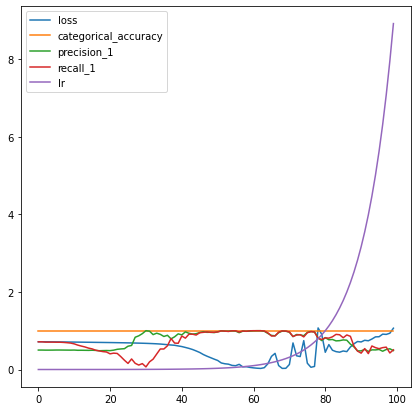

In [18]:
pd.DataFrame(history.history).plot(figsize=(7,7))

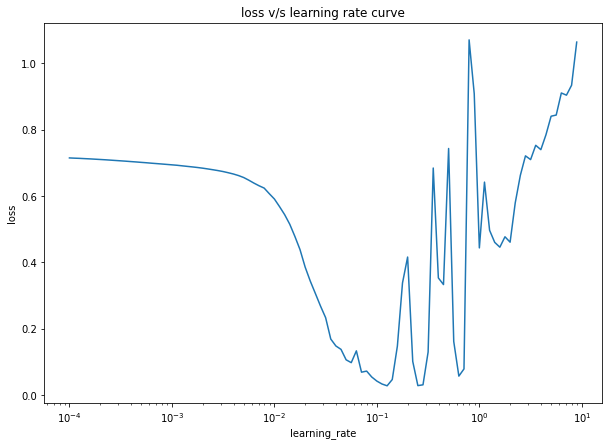

In [19]:
plt.figure(figsize=(10, 7))
plt.semilogx(history.history['lr'], history.history['loss'])
plt.xlabel('learning_rate')
plt.ylabel('loss')
plt.title('loss v/s learning rate curve')
plt.show();

**From this curve we can see that the ideal learning rate should be around 0.02**

### Train the model with this learing rate

In [20]:
model3 = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(2,)),
        tf.keras.layers.Dense(10, 'relu'),
        tf.keras.layers.Dense(1, 'sigmoid')
    ]
)
model3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.02),
    metrics = [tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.Precision(),tf.keras.metrics.Recall()]
)
history3 = model3.fit(
    X_train,
    y_train,
    epochs = 100
)

Epoch 1/100
25/25 [==============================] - 2s 3ms/step - loss: 0.6973 - categorical_accuracy: 1.0000 - precision_2: 0.5026 - recall_2: 0.4813
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6839 - categorical_accuracy: 1.0000 - precision_2: 0.5592 - recall_2: 0.2120
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6717 - categorical_accuracy: 1.0000 - precision_2: 0.7068 - recall_2: 0.5411
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6540 - categorical_accuracy: 1.0000 - precision_2: 0.7049 - recall_2: 0.6434
Epoch 5/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6372 - categorical_accuracy: 1.0000 - precision_2: 0.7742 - recall_2: 0.4788
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6060 - categorical_accuracy: 1.0000 - precision_2: 0.7884 - recall_2: 0.6783
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5710 - catego

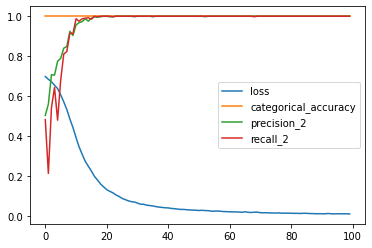

In [21]:
pd.DataFrame(history3.history).plot()

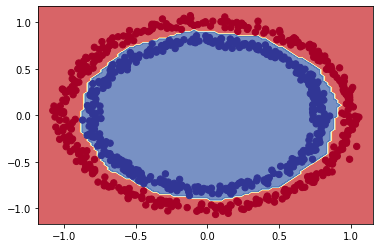

In [22]:
plot_decision_boundary(model3, X_train, y_train)

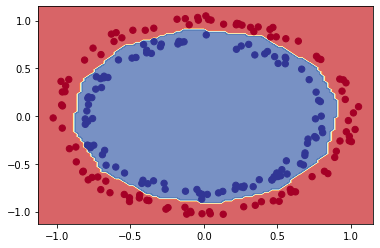

In [23]:
plot_decision_boundary(model3, X_test, y_test)

### Classification evaluation methods and metrics
1. Accuracy
2. Precision -> High precision -> less FP
3. Recall -> High Recall -> less FN
4. F1-score
5. Confusion matrix -> can use sklearn inbuilt module

#### Calculate confusion matrix

In [24]:
y_pred = model3.predict(X_test)
y_pred[:10], y_test[:10]

(array([[9.9876863e-01],
        [9.9905443e-01],
        [9.9716187e-01],
        [1.8325448e-04],
        [8.8425982e-01],
        [8.3838466e-05],
        [9.9214947e-01],
        [9.9923509e-01],
        [9.8303807e-01],
        [8.8224339e-01]], dtype=float32),
 array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1]))

In [25]:
y_preds_round = np.round(y_pred).astype(int)
y_preds_round[:10], y_pred[:10], y_test[:10]

(array([[1],
        [1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1],
        [1]]), array([[9.9876863e-01],
        [9.9905443e-01],
        [9.9716187e-01],
        [1.8325448e-04],
        [8.8425982e-01],
        [8.3838466e-05],
        [9.9214947e-01],
        [9.9923509e-01],
        [9.8303807e-01],
        [8.8224339e-01]], dtype=float32), array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1]))

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true = y_test, y_pred = y_preds_round)

### Plot confusion matrix

In [27]:
import seaborn as sns

In [3]:
def plot_confusion_matrix(y_true, y_pred, class_names = ["Class0", "Class1"], classes = 2, figsize = (6,4), cmap='Blues'):
  from sklearn.metrics import confusion_matrix
  cm = confusion_matrix(y_true = y_true, y_pred = y_pred)
  percentages = (cm / cm.sum(axis=1) * 100).astype(int)
  #print(percentages)

  labels = np.array([f"{a}\n{p}%" for a, p in zip(cm.flatten(), percentages.flatten())]).reshape(classes, classes)

  plt.figure(figsize=figsize)
  ax = sns.heatmap(cm, annot=labels, fmt='', cmap=cmap)
  ax.set_title("Confusion Matrix")
  ax.set_xlabel("Predicted label")
  ax.set_ylabel("Actual label")
  ax.set_xticklabels(class_names)
  ax.set_yticklabels(class_names)

  plt.show();

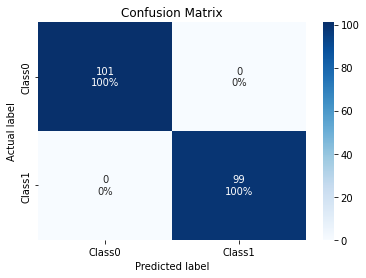

In [120]:
plot_confusion_matrix(y_test, y_preds_round)

## Multiclass Classification
larget dataset

In [4]:
fashion = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
type(train_images)

numpy.ndarray

In [8]:
len(set(train_labels))

10

In [9]:
from collections import Counter
Counter(train_labels), Counter(test_labels)

(Counter({0: 6000,
          1: 6000,
          2: 6000,
          3: 6000,
          4: 6000,
          5: 6000,
          6: 6000,
          7: 6000,
          8: 6000,
          9: 6000}),
 Counter({0: 1000,
          1: 1000,
          2: 1000,
          3: 1000,
          4: 1000,
          5: 1000,
          6: 1000,
          7: 1000,
          8: 1000,
          9: 1000}))

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

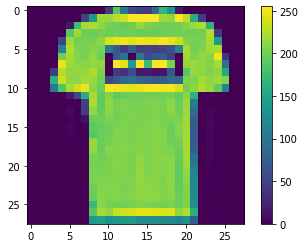

In [11]:
plt.figure(figsize=(6,4))
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show();

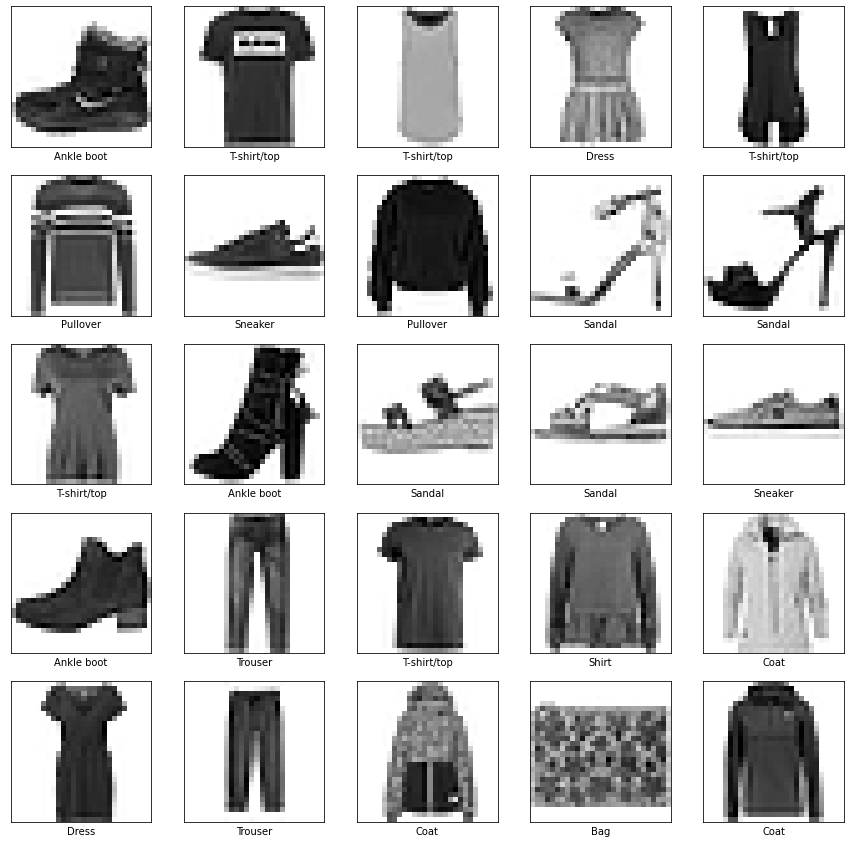

In [12]:
plt.figure(figsize=(15,15))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
fashion_model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(28,28,)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

fashion_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = [tf.keras.metrics.CategoricalCrossentropy()]
)
#tf.keras.utils.plot_model(fashion_model, show_shapes=True)
history1 = fashion_model.fit(
    train_images,
    train_labels, 
    epochs=100
)

Epoch 1/100


ValueError: ignored

**Above error occured because we were passing y as an integer, we need to one_hot encode y before passing it to the model. y[0] should be (10,1)**

In [14]:
train_labels_enc = tf.cast(tf.one_hot(tf.constant(train_labels), depth=10), tf.int32)
test_labels_enc = tf.cast(tf.one_hot(tf.constant(test_labels), depth=10), tf.int32)
train_labels[:5], train_labels_enc[:5]

(array([9, 0, 0, 3, 0], dtype=uint8),
 <tf.Tensor: shape=(5, 10), dtype=int32, numpy=
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)>)

In [15]:
test_labels[:5], test_labels_enc[:5]

(array([9, 2, 1, 1, 6], dtype=uint8),
 <tf.Tensor: shape=(5, 10), dtype=int32, numpy=
 array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]], dtype=int32)>)

In [16]:
fashion_model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(28,28,)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

fashion_model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = [tf.keras.metrics.CategoricalCrossentropy()]
)
#tf.keras.utils.plot_model(fashion_model, show_shapes=True)

# Adding learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 0.0001*(10**(epoch/20)))

history1 = fashion_model.fit(
    train_images,
    train_labels_enc, 
    callbacks = [lr_scheduler],
    epochs=100
)

Epoch 1/100
1875/1875 [==============================] - 5s 2ms/step - loss: 12.2144 - categorical_crossentropy: 12.2144 - lr: 1.0000e-04
Epoch 2/100
1875/1875 [==============================] - 4s 2ms/step - loss: 4.3528 - categorical_crossentropy: 4.3528 - lr: 1.1220e-04
Epoch 3/100
1875/1875 [==============================] - 4s 2ms/step - loss: 2.7053 - categorical_crossentropy: 2.7053 - lr: 1.2589e-04
Epoch 4/100
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0897 - categorical_crossentropy: 1.0897 - lr: 1.4125e-04
Epoch 5/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7064 - categorical_crossentropy: 0.7064 - lr: 1.5849e-04
Epoch 6/100
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5843 - categorical_crossentropy: 0.5843 - lr: 1.7783e-04
Epoch 7/100
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4968 - categorical_crossentropy: 0.4968 - lr: 1.9953e-04
Epoch 8/100
1875/1875 [=======================

### Adding validation (test) set in training

**Note:** We can use `CategoricalCrossentropy()` if the labels are one-hot encoded. 
We can work with integer labels also if we use `SparseCategoricalCrossentropy()` also.

In [17]:
history1.history.keys()

dict_keys(['loss', 'categorical_crossentropy', 'lr'])

Text(0, 0.5, 'loss')

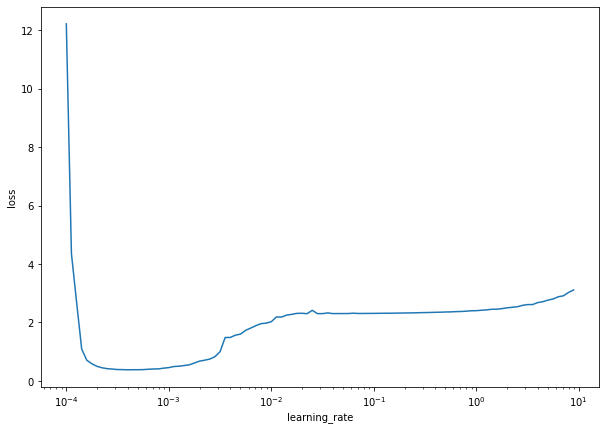

In [18]:
plt.figure(figsize=(10,7))
plt.semilogx(history1.history['lr'], history1.history['loss'])
plt.xlabel('learning_rate')
plt.ylabel('loss')

In [19]:
# Lets use learning rate of 0.005

In [20]:
fashion_model2 = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(28,28,)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

fashion_model2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = [tf.keras.metrics.Accuracy()]
)
#tf.keras.utils.plot_model(fashion_model, show_shapes=True)


history2 = fashion_model2.fit(
    train_images,
    train_labels_enc,
    epochs=10,
    validation_data = [test_images, test_labels_enc]
)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 11.6959 - accuracy: 0.6782 - val_loss: 5.9938 - val_accuracy: 0.6239
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 4.2324 - accuracy: 0.5519 - val_loss: 3.2274 - val_accuracy: 0.4303
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8755 - accuracy: 0.2696 - val_loss: 1.2381 - val_accuracy: 0.1964
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9808 - accuracy: 0.1921 - val_loss: 0.9622 - val_accuracy: 0.1800
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7703 - accuracy: 0.1778 - val_loss: 0.8141 - val_accuracy: 0.1610
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6375 - accuracy: 0.1504 - val_loss: 0.7273 - val_accuracy: 0.1276
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5503 - accuracy: 0.1310 - val_loss: 0.6555 - val_accuracy

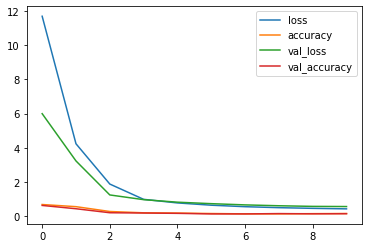

In [21]:
pd.DataFrame(history2.history).plot()

In [22]:
fashion_model3 = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(28,28,)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

fashion_model3.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics = [tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.Accuracy()]
)
#tf.keras.utils.plot_model(fashion_model, show_shapes=True)


history3 = fashion_model3.fit(
    train_images,
    train_labels_enc,
    epochs=20,
    validation_data = [test_images, test_labels_enc]
)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 6.3771 - categorical_accuracy: 0.6906 - accuracy: 0.3080 - val_loss: 2.2354 - val_categorical_accuracy: 0.7356 - val_accuracy: 0.2519
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5907 - categorical_accuracy: 0.7707 - accuracy: 0.2203 - val_loss: 1.3111 - val_categorical_accuracy: 0.7785 - val_accuracy: 0.2025
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9951 - categorical_accuracy: 0.7896 - accuracy: 0.1641 - val_loss: 0.9672 - val_categorical_accuracy: 0.7885 - val_accuracy: 0.1398
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7378 - categorical_accuracy: 0.8089 - accuracy: 0.1306 - val_loss: 0.8514 - val_categorical_accuracy: 0.7989 - val_accuracy: 0.1219
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6028 - categorical_accuracy: 0.8245 - accuracy: 0.1140 - val_loss: 0.7245 - val_ca

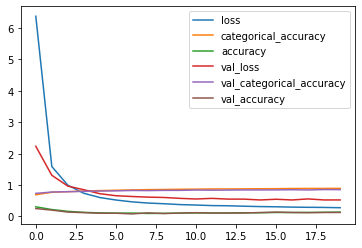

In [23]:
pd.DataFrame(history3.history).plot()

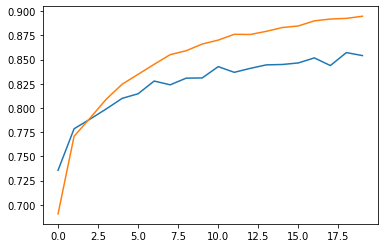

In [24]:
plt.plot(history3.history['val_categorical_accuracy'])
plt.plot(history3.history['categorical_accuracy'])
plt.show();

In [25]:
preds = fashion_model3.predict(test_images)
preds[0], test_labels[0], test_labels_enc[0]

(array([4.1287807e-21, 2.5968425e-32, 2.3874244e-20, 7.6892611e-19,
        3.5232696e-22, 7.1667244e-05, 1.0251863e-20, 2.4911067e-03,
        6.6664013e-16, 9.9743724e-01], dtype=float32),
 9,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)>)

In [26]:
pred_labels_int =  preds.argmax(axis=1)
pred_labels_int[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

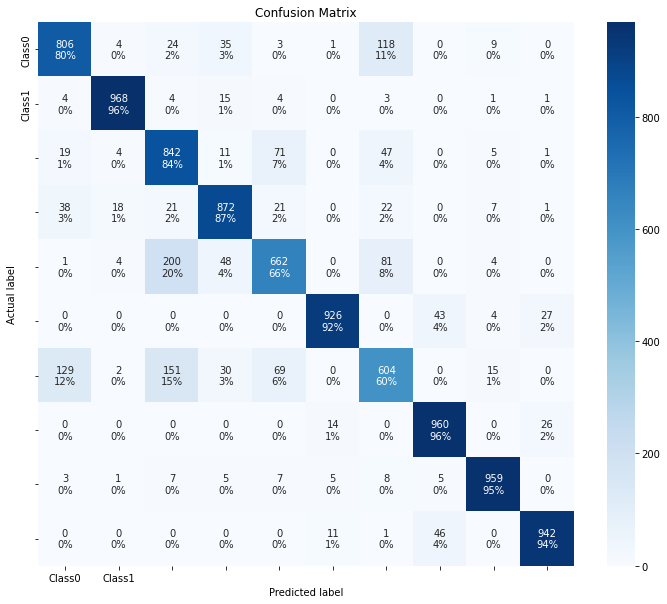

In [29]:
import numpy as np
import seaborn as sns
plot_confusion_matrix(test_labels, pred_labels_int, classes=10, figsize=(12,10))

### `CategoricalAccuracy()` metric should be used in multi-class classification with one-hot encoded labels

### Data Normalization

In [30]:
# Get the training and test data by dividing it by the max number
train_images_norm = train_images / train_images.max()
test_images_norm = test_images / test_images.max()
train_images_norm.min(), train_images_norm.max(), test_images_norm.min(), test_images_norm.max()

(0.0, 1.0, 0.0, 1.0)

In [31]:
train_images.min(), train_images.max(), test_images.min(), test_images.max()

(0, 255, 0, 255)

In [32]:
fashion_model4 = tf.keras.Sequential(
    [
        tf.keras.Input(shape=(28, 28,)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)
fashion_model4.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(0.0001),
    metrics = [tf.keras.metrics.CategoricalAccuracy()]
)

history4 = fashion_model4.fit(
    train_images_norm,
    train_labels_enc,
    epochs = 20,
    validation_data = [test_images_norm, test_labels_enc]
)

Epoch 1/20
1875/1875 [==============================] - 8s 3ms/step - loss: 0.7435 - categorical_accuracy: 0.7641 - val_loss: 0.5521 - val_categorical_accuracy: 0.8135
Epoch 2/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4926 - categorical_accuracy: 0.8342 - val_loss: 0.4896 - val_categorical_accuracy: 0.8304
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4464 - categorical_accuracy: 0.8469 - val_loss: 0.4598 - val_categorical_accuracy: 0.8391
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4193 - categorical_accuracy: 0.8561 - val_loss: 0.4420 - val_categorical_accuracy: 0.8470
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3996 - categorical_accuracy: 0.8609 - val_loss: 0.4329 - val_categorical_accuracy: 0.8483
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3862 - categorical_accuracy: 0.8651 - val_loss: 0.4156 - val_categorical_accuracy:

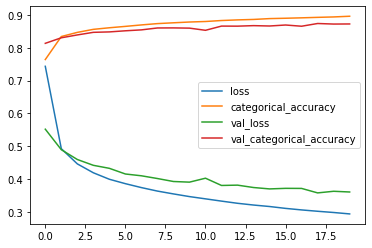

In [33]:
pd.DataFrame(history4.history).plot()

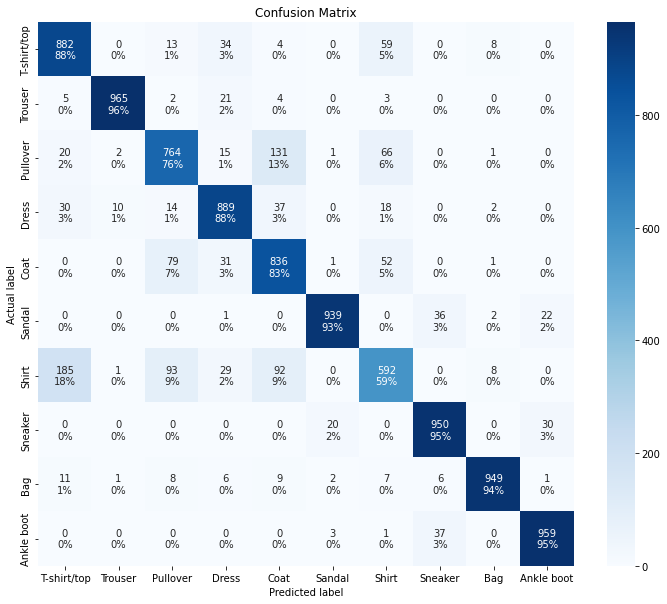

In [34]:
preds = fashion_model4.predict(test_images_norm)
plot_confusion_matrix(test_labels, preds.argmax(axis=1), class_names, classes=10, figsize=(12,10))

### Weights and biases of the model

In [35]:
model_layers = fashion_model4.layers

In [36]:
model_layers

In [40]:
model_layers[0].input_shape, model_layers[0].output_shape

((None, 28, 28), (None, 784))

In [41]:
model_layers[1].weights

[<tf.Variable 'dense_9/kernel:0' shape=(784, 100) dtype=float32, numpy=
 array([[ 0.0099601 ,  0.15579434, -0.06714306, ..., -0.07940987,
         -0.04751055, -0.10930813],
        [-0.066469  , -0.04092802, -0.03901716, ...,  0.00479629,
         -0.04911431, -0.06566516],
        [-0.01171032,  0.03186613, -0.10170723, ...,  0.02148303,
         -0.11638388, -0.05417068],
        ...,
        [-0.08936619, -0.13874568,  0.07923542, ...,  0.07017333,
          0.05426206, -0.04526554],
        [ 0.03143219, -0.02625243,  0.13352855, ...,  0.15541795,
          0.17501651, -0.02743517],
        [-0.04373104, -0.02847755, -0.11160635, ...,  0.1368164 ,
         -0.03682274, -0.05042698]], dtype=float32)>,
 <tf.Variable 'dense_9/bias:0' shape=(100,) dtype=float32, numpy=
 array([ 0.06519403,  0.14654481, -0.10567155,  0.21355814,  0.24239115,
         0.06972409,  0.09930742,  0.08194678, -0.12173293,  0.12403482,
         0.19381002,  0.18278871,  0.10407953,  0.21829842, -0.02113387,


In [42]:
weights, biases = model_layers[1].weights
weights.shape, biases.shape

(TensorShape([784, 100]), TensorShape([100]))